### This is largely a scratch pad that was used for tuning experimentation

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import metrics

%run 00_Functions.ipynb
%run 01_Data_Cleaning.ipynb


In [81]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
# see all of my columns, no truncating!

Make a new version of a usable dataframe

In [82]:
X_3 = props.copy()

In [84]:
SF = ['Gr Liv Area','1st Flr SF','2nd Flr SF','BsmtFin SF 1','BsmtFin SF 2']
log_transform(X_3, SF)

In [85]:
X_3.loc[: , SF].fillna(0, inplace = True)

In [86]:
X_3.loc[: , SF].isnull().sum()

Gr Liv Area     0
1st Flr SF      0
2nd Flr SF      0
BsmtFin SF 1    0
BsmtFin SF 2    0
dtype: int64

In [78]:
X_3.describe()

C:\Users\mikem\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mikem\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mikem\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Lot Frontage,Lot Area,Paved Street,Has All Utilities,Gentle Slope,Years since built,Years since remodel,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Years since last sold,SalePrice
count,1702.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.00000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,1914.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000
mean,68.960047,10038.427937,0.996545,0.999013,0.951629,38.584403,26.01925,99.843534,-inf,-inf,566.524186,1056.915104,0.930405,7.005916,-inf,5.580948,7.259112,0.427443,0.064166,1.571570,0.367720,2.843534,1.042942,6.434353,0.589339,1978.356322,1.773445,472.959526,0.906713,94.153998,47.002468,22.548371,2.623396,16.715202,2.427443,52.210760,2.221125,180903.863771
std,23.218783,6707.696525,0.058693,0.031411,0.214602,30.145229,21.03601,175.050567,NaN,NaN,444.362373,449.006257,0.254526,0.323153,NaN,51.379446,0.321674,0.522971,0.253039,0.547101,0.499406,0.826535,0.209955,1.559957,0.638025,24.898844,0.765623,216.184467,0.290906,128.923298,66.076293,59.760393,25.383222,57.697759,38.014135,576.893785,1.314860,79112.847055
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-inf,-inf,0.000000,0.000000,0.000000,5.811141,-inf,0.000000,5.811141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,58.000000,7500.000000,1.000000,1.000000,1.000000,10.000000,6.00000,0.000000,NaN,NaN,220.000000,793.000000,1.000000,6.779069,NaN,0.000000,7.026649,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,317.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,129500.000000
50%,68.000000,9402.500000,1.000000,1.000000,1.000000,36.000000,17.00000,0.000000,5.908083,NaN,474.000000,994.000000,1.000000,6.995766,NaN,0.000000,7.273786,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,1.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,161000.000000
75%,80.000000,11498.000000,1.000000,1.000000,1.000000,57.000000,46.00000,161.750000,6.597146,NaN,810.000000,1315.500000,1.000000,7.245655,6.535241,0.000000,7.454720,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,1.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,213430.000000
max,313.000000,159000.000000,1.000000,1.000000,1.000000,138.000000,60.00000,1600.000000,8.638348,7.295735,2336.000000,6110.000000,1.000000,8.536015,7.529406,1064.000000,8.637994,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2010.000000,5.000000,1418.000000,1.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,4.000000,611657.000000


In [87]:
X = X_3.loc[: , SF]
y = X_3['SalePrice']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2023)

In [89]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [90]:
lr.score(X_test, y_test)

0.5949990906795617

In [38]:
y_pred = lr.predict(X_test)

In [39]:
resids = y_test - y_pred

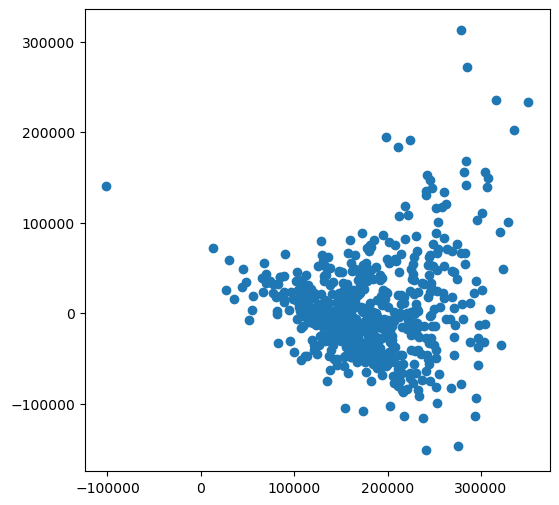

In [40]:
plt.figure(figsize=(6,6))
plt.scatter(x = y_pred, y = resids)

(array([  2.,   4.,  10.,  24.,  89., 119., 136.,  90.,  64.,  31.,  11.,
          7.,   9.,   4.,   3.,   1.,   2.,   0.,   1.,   1.]),
 array([-151498.9443072 , -128289.08310895, -105079.2219107 ,
         -81869.36071245,  -58659.4995142 ,  -35449.63831595,
         -12239.7771177 ,   10970.08408054,   34179.94527879,
          57389.80647704,   80599.66767529,  103809.52887354,
         127019.39007179,  150229.25127003,  173439.11246828,
         196648.97366653,  219858.83486478,  243068.69606303,
         266278.55726128,  289488.41845953,  312698.27965777]),
 <BarContainer object of 20 artists>)

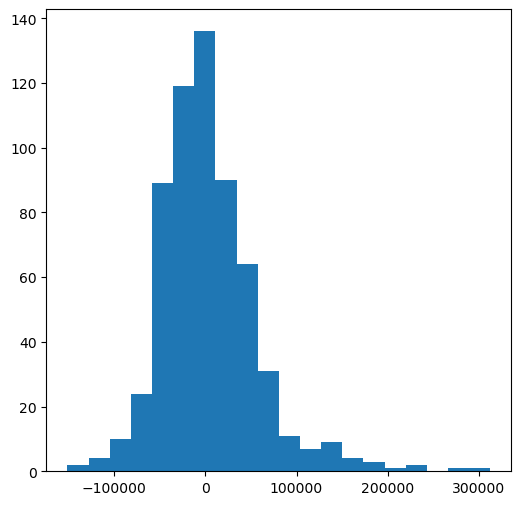

In [41]:
plt.figure(figsize=(6,6))
plt.hist(resids, bins = 20)

### Dropping values that are either clearly colinear (square footage totals, for example) and PID)

In [213]:
X_2.drop(['PID','Garage Yr Blt'], axis = 1, inplace = True)

In [214]:
non_numerics = X_2.select_dtypes(exclude = np.number)

In [215]:
corr = X_2.corr(numeric_only = True)[['SalePrice']].sort_values( by = 'SalePrice', ascending = False)

In [216]:
corr

,SalePrice
SalePrice,1.000000
Gr Liv Area,0.699026
Garage Area,0.648661
Garage Cars,0.647015
Total Bsmt SF,0.631975
1st Flr SF,0.623523
Full Bath,0.538471
Mas Vnr Area,0.512699
TotRms AbvGrd,0.505188
Fireplaces,0.471222


In [217]:
non_numerics.columns

Index(['MS SubClass', 'MS Zoning', 'Alley', 'Lot Shape', 'Land Contour',
       'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature', 'Mo Sold',
       'Sale Type'],
      dtype='object')

In [218]:
# props_dummy = pd.get_dummies(props, columns = non_numerics.columns, drop_first = True)

In [219]:
corr = X_2.corr(numeric_only = True)[['SalePrice']].sort_values( by = 'SalePrice', ascending = False)

In [220]:
correlated_numeric_features = corr[(corr['SalePrice'] > 0.10) |  (corr['SalePrice'] < -0.10)].index[1:]

## Some dropping / feature engineering based on what we see above

The following are either sparse data or could introduce multicolinearity (such as ages of subsections of the house and totals of square footage already represented here)

In [221]:
X_2_non_numerics = X_2.select_dtypes(exclude = np.number)

In [222]:
X_2_nums = X_2.loc[:, list(correlated_numeric_features)]
y2 = X_2['SalePrice']

In [223]:
replace_NaN_with_NA(X_2, [column for column in X_2_non_numerics.columns if X_2_non_numerics[column].isnull().sum() > 0])

In [224]:
X_2_dummy = pd.get_dummies(X_2_non_numerics, columns = non_numerics.columns, drop_first = True)

In [225]:
X_2_dummy.shape

(2026, 257)

In [226]:
X_2_nums.shape

(2026, 26)

In [227]:
X_2_means = X_2_dummy.mean().sort_values().to_frame()
X_2_dummy_trimmed = list(X_2_means[(X_2_means[0] > 0.10) & (X_2_means[0] < 0.90)].index)

In [228]:
X_2_use = X_2_nums.join(X_2_dummy.loc[:, X_2_dummy_trimmed], on='Id', how='left')

In [229]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2_use, y2, test_size = 0.3, random_state=2023)

In [230]:
si = SimpleImputer()

In [231]:
X2_train_si = si.fit_transform(X2_train)
X2_test_si = si.transform(X2_test)

In [232]:
ols = LinearRegression()
ols.fit(X2_train_si, y2_train)

LinearRegression()

In [233]:
ols.coef_

array([ 1.04728573e+01,  4.96997962e+00,  1.38858350e+04,  2.20363508e+01,
        2.09077131e+01,  6.89599951e+03,  3.65794818e+01,  1.57737204e+03,
        9.76476709e+03, -1.46349654e+01, -6.84405236e+01,  1.53412878e+01,
       -5.58614147e+00,  3.94772446e-01,  8.25681846e+03,  1.04004583e+04,
        6.06504247e+02,  9.72413523e+03,  4.30240505e+01, -6.82151216e+00,
       -8.45281702e+02,  6.69202876e+01, -1.77409535e+04,  2.50509110e+01,
       -3.66416172e+02, -1.99901164e+02,  1.73780252e+03,  1.50983151e+04,
       -3.53183069e+03,  1.91527433e+04,  4.27329609e+03,  1.65227770e+04,
        8.56542064e+03, -9.47705958e+03,  7.39108424e+03,  8.34677302e+03,
       -6.04190916e+03, -4.33008937e+03, -3.95056907e+03, -2.20341528e+03,
        1.09155300e+04, -8.44114497e+03,  2.57430918e+03,  3.19745222e+03,
        9.79913658e+02,  3.07640467e+03, -1.58213194e+03, -2.70187844e+03,
       -7.00564894e+03,  4.25184384e+03,  4.13032817e+02, -4.83594245e+03,
        3.33453085e+02, -

In [234]:
ols.score(X2_test_si, y2_test)

0.8598011212832428

In [235]:
ols.score(X2_train_si, y2_train)

0.8398469824385021

In [236]:
y2_test_mean = y2_test.mean()

In [237]:
y2_baseline = y2_test/y2_test * y2_test_mean

In [238]:
y2_baseline.shape

(608,)

## R2 Score

### Train

In [239]:
ols.score(X2_train_si, y2_train)

0.8398469824385021

### Test

In [240]:
ols.score(X2_test_si, y2_test)

0.8598011212832428

### Obtaining Predictions

In [241]:
y2_test_pred = ols.predict(X2_test_si)
y2_train_pred = ols.predict(X2_train_si)

## Mean Absolute Error

### Train

In [242]:
metrics.mean_absolute_error(y2_train, y2_train_pred)

19740.238049741813

### Test

In [243]:
metrics.mean_absolute_error(y2_test, y2_test_pred)

21382.877120508732

### Baseline

In [244]:
metrics.mean_absolute_error(y2_test, y2_baseline)

61811.8075116863

## Mean Squared Error and Root Mean Squared Error

### Train

In [245]:
print(f"MSE: {metrics.mean_squared_error(y2_train, y2_train_pred, squared=True)}   RMSE: {metrics.mean_squared_error(y2_train, y2_train_pred, squared=False)}")

MSE: 950909515.598514   RMSE: 30836.82077644377


### Test

In [246]:
print(f"MSE: {metrics.mean_squared_error(y2_test, y2_test_pred, squared=True)}   RMSE: {metrics.mean_squared_error(y2_test, y2_test_pred, squared=False)}")

MSE: 977602643.7769591   RMSE: 31266.637871331146


### Baseline

In [247]:
print(f"MSE: {metrics.mean_squared_error(y_test, y_baseline, squared=True)}   RMSE: {metrics.mean_squared_error(y_test, y_baseline, squared=False)}")

NameError: name 'y_test' is not defined